In [2]:
import plotly.graph_objects as go
import numpy as np
from geopy.distance import geodesic

# Create dummy data for latitude, longitude, and pressure over Amazon Rainforest
np.random.seed(42)
lats = np.random.uniform(-3.5, -1.0, 100)  # Latitude values for Amazon
lons = np.random.uniform(-60, -55, 100)    # Longitude values for Amazon
pressure = np.random.uniform(950, 1050, 100)  # Random pressure values (hPa)

# Create a scatter plot with atmospheric pressure as color
fig = go.Figure(
    go.Scattergeo(
    lon=lons,
    lat=lats,
    mode='markers',
    marker=dict(
        size=10,
        color=pressure,
        colorscale='Viridis',
        colorbar=dict(title="Pressure (hPa)"),
        showscale=True
    ),
    hoverinfo='text',
    text=[f"Lat: {lat:.2f}, Lon: {lon:.2f}, Pressure: {p:.2f} hPa" 
        for lat, lon, p in zip(lats, lons, pressure)]
))

# Add layout features for better view over the Amazon
fig.update_geos(projection_type="mercator", 
                lataxis_range=[-3.5, -1.0], 
                lonaxis_range=[-60, -55])
fig.update_layout(title="Atmospheric Pressure over Amazon Rainforest")

# Variables to store clicked points
clicked_points = []

# Callback function for click events
def handle_click(trace, points, state):
    global clicked_points
    if len(points.point_inds) > 0:
        clicked_lat = trace.lat[points.point_inds[0]]
        clicked_lon = trace.lon[points.point_inds[0]]
        clicked_points.append((clicked_lat, clicked_lon))

        if len(clicked_points) == 2:
            # Calculate the distance between two points
            distance = geodesic(clicked_points[0], clicked_points[1]).kilometers

            # Add a line connecting the two points
            fig.add_trace(go.Scattergeo(
                lon=[clicked_points[0][1], clicked_points[1][1]],
                lat=[clicked_points[0][0], clicked_points[1][0]],
                mode='lines+markers',
                line=dict(color='red', width=2),
                marker=dict(size=10),
                hoverinfo='none',
            ))

            # Add an annotation for the distance
            mid_lat = (clicked_points[0][0] + clicked_points[1][0]) / 2
            mid_lon = (clicked_points[0][1] + clicked_points[1][1]) / 2
            fig.add_annotation(
                x=mid_lon, y=mid_lat, text=f"Distance: {distance:.2f} km",
                showarrow=False, font=dict(color="red", size=12)
            )

            # Reset clicked points
            clicked_points = []

    fig.show()

# Attach the callback to the figure
fig.data[0].on_click(handle_click)

# Show the plot
fig.show()


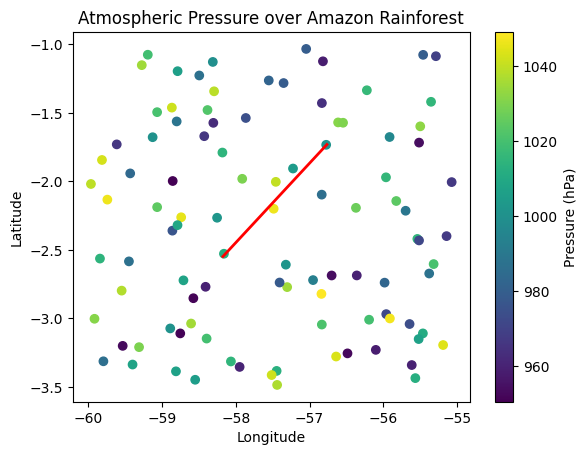

In [3]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from geopy.distance import geodesic

# Create a Tkinter window
root = tk.Tk()
root.title("Atmospheric Pressure over Amazon Rainforest")

# Generate random data for lat, long, and pressure
np.random.seed(42)
lats = np.random.uniform(-3.5, -1.0, 100)  # Latitude for Amazon
lons = np.random.uniform(-60, -55, 100)    # Longitude for Amazon
pressure = np.random.uniform(950, 1050, 100)  # Random pressure (hPa)

# Create a figure and axis using Matplotlib
fig, ax = plt.subplots()
scatter = ax.scatter(lons, lats, c=pressure, cmap='viridis')
ax.set_title('Atmospheric Pressure over Amazon Rainforest')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar for the pressure
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Pressure (hPa)')

# Store clicked points to calculate distance
clicked_points = []

# Click event handler
def on_click(event):
    if event.inaxes == ax:
        clicked_lat = event.ydata
        clicked_lon = event.xdata
        clicked_points.append((clicked_lat, clicked_lon))
        
        if len(clicked_points) == 2:
            # Calculate the distance between two points
            distance = geodesic(clicked_points[0], clicked_points[1]).kilometers
            
            # Connect the two points with a line
            ax.plot([clicked_points[0][1], clicked_points[1][1]], 
                    [clicked_points[0][0], clicked_points[1][0]], 
                    color='red', linewidth=2)
            
            # Show the distance in a popup
            messagebox.showinfo("Distance", f"Distance: {distance:.2f} km")
            
            # Clear the points for the next selection
            clicked_points.clear()
            
        # Redraw the figure
        fig.canvas.draw()

# Bind the click event to the plot
fig.canvas.mpl_connect('button_press_event', on_click)

# Integrate Matplotlib figure into the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Start the Tkinter event loop
root.mainloop()


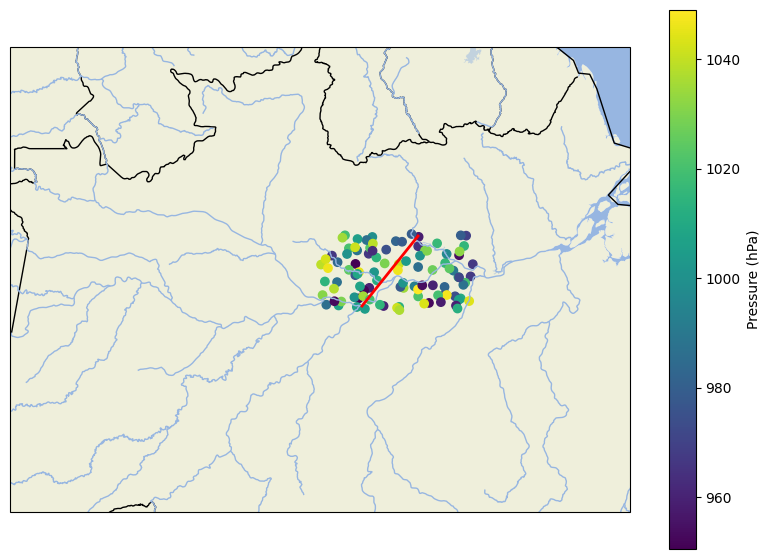

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.distance import geodesic
import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Create a Tkinter window
root = tk.Tk()
root.title("Atmospheric Pressure over Amazon Rainforest")

# Generate random data for lat, lon, and pressure
np.random.seed(42)
lats = np.random.uniform(-3.5, -1.0, 100)  # Latitude for Amazon
lons = np.random.uniform(-60, -55, 100)    # Longitude for Amazon
pressure = np.random.uniform(950, 1050, 100)  # Random pressure (hPa)

# Create a Cartopy figure and axis with a Mercator projection
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-70, -50, -10, 5])  # Define extent over the Amazon region

# Add coastlines, borders, and other map-related features
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# Plot pressure data points
sc = ax.scatter(lons, lats, c=pressure, cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", pad=0.05)
cbar.set_label('Pressure (hPa)')

# Store clicked points for distance calculation
clicked_points = []

# Event handler for clicking on the plot
def on_click(event):
    if event.inaxes == ax:
        # Get clicked coordinates (latitude and longitude)
        clicked_lat = event.ydata
        clicked_lon = event.xdata
        clicked_points.append((clicked_lat, clicked_lon))
        
        if len(clicked_points) == 2:
            # Calculate the geodesic distance between two clicked points
            distance = geodesic(clicked_points[0], clicked_points[1]).kilometers
            
            # Connect the two points with a line
            ax.plot([clicked_points[0][1], clicked_points[1][1]], 
                    [clicked_points[0][0], clicked_points[1][0]], 
                    color='red', linewidth=2, transform=ccrs.PlateCarree())
            
            # Show the distance in a Tkinter popup
            messagebox.showinfo("Distance", f"Distance: {distance:.2f} km")
            
            # Clear clicked points for the next calculation
            clicked_points.clear()
        
        # Redraw the figure
        fig.canvas.draw()

# Bind the click event to the Cartopy plot
fig.canvas.mpl_connect('button_press_event', on_click)

# Embed the Matplotlib figure into the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Start Tkinter event loop
root.mainloop()